## <Center>本节课知识点提炼</Center>


*对世界理解的最高境界是能创造世界--生成模型*

### 本节课重点与难点
* 重点：GAN原理、DCGAN的原理及应用
* 难点：GAN相关公式推导

### 1.GAN的应用  
* 图像生成
* 视频检测
* 图像超精度变换
* 图像变换


### 2.GAN简单介绍

[论文:Generative Adversarial Networks](https://arxiv.org/abs/1406.2661)  <b>GAN公式推导请查看视频</b>   
Generator + Discriminator = GAN  

   Generator是一个生成图片的网络，Discriminator是一个判别网络，判别一张图片是不是“真实的”。它的输入参数是x，x代表一张图片；  
   在训练过程中，生成网络G的目标就是尽量生成真实的图片去欺骗判别网络D；而D的目标就是尽量把G生成的图片和真实的图片分别开来。这样，G和D构成了一个动态的“博弈过程”。在最理想的状态下，G可以生成足以“以假乱真”的图片G(z)。

数学语言描述  
$$\min _{G} \max _{D} V(D, G)=\mathbb{E}_{\boldsymbol{x} \sim p_{\text {data }}(\boldsymbol{x})}[\log D(\boldsymbol{x})]+\mathbb{E}_{\boldsymbol{z} \sim p_{\boldsymbol{z}}(\boldsymbol{z})}[\log (1-D(G(\boldsymbol{z})))]$$
1. 整个式子由两项构成: x表示真实图片，z表示输入G网络的噪声，G(z)表示G网络生成的图片;  
2. D(x)表示D网络判断真实图片是否真实的概率(因为x就是真实的，所以对于D来说，这个值越接近1越好); D(G(z))是D网络判断G生成的图片的是否真实的概率;  
3. D(G(z))是D网络判断G生成的图片是否真实的概率，G希望自己生成的图片“越接近真实越好”;就是说，G希望D(G(z))尽可能得大，这时V(D, G)会变小。因此我们看到式子的最前面的记号是min_G。   
4. D的能力越强，D(x)应该越大，D(G(x))应该越小。这时V(D,G)会变大。因此式子对于D来说是求最大(max_D)

### 3.相对熵（KL散度）与JS散度

   相对熵又称KL散度,如果我们对于同一个随机变量x有两个单独的概率分布P(x)和Q(x)，我们可以使用KL散度(Kullback-Leibler divergence）来衡量这两个分布的差异。

  在机器学习中，P往往用来表示样本的真实分布，Q用来表示模型所预测的分布，那么KL散度就可以计算两个分布的差异，也就是Loss损失值。
$$D_{KL}(p||q)=\sum_{i=1}^{n}{p(x_i)log(\frac{p(x_i)}{q(x_i)})}$$
  从KL散度公式中可以看到Q的分布越接近P（Q分布越拟合P），那么散度值越小，即损失值越小。
因为对数函数是凸函数，所以KL散度的值为非负数。

   JS散度度量了两个概率分布的相似度，基于KL散度的变体，解决了KL散度非对称的问题;  
   一般地，JS散度是对称的，其取值是0到1之间。定义如下：
   $$J S\left(P_{1} \| P_{2}\right)=\frac{1}{2} K L\left(P_{1} \| \frac{P_{1}+P_{2}}{2}\right)+\frac{1}{2} K L\left(P_{2} \| \frac{P_{1}+P_{2}}{2}\right)$$

### 4.DCGAN实践
[论文：DCGAN](https://arxiv.org/abs/1511.06434)  
DCGAN的原理和GAN大致一样, 把上述的G和D换成了两个卷积神经网络（CNN);但是DCGAN对卷积神经网络的结构做了一些改变，以提高样本的质量和收敛的速度，这些改变有：  
* 取消所有Pooling层:G网络中使用转置卷积进行上采样，D网络中用加入stride的卷积代替Pooling;
* 在D和G中均使用Batch Normalization;
* 去掉FC层，使网络变为全卷积网络;
* G网络中使用ReLU作为激活函数，最后一层使用tanh;
* D网络中使用LeakyReLU作为激活函数

DCGAN中的G网络图如下：  

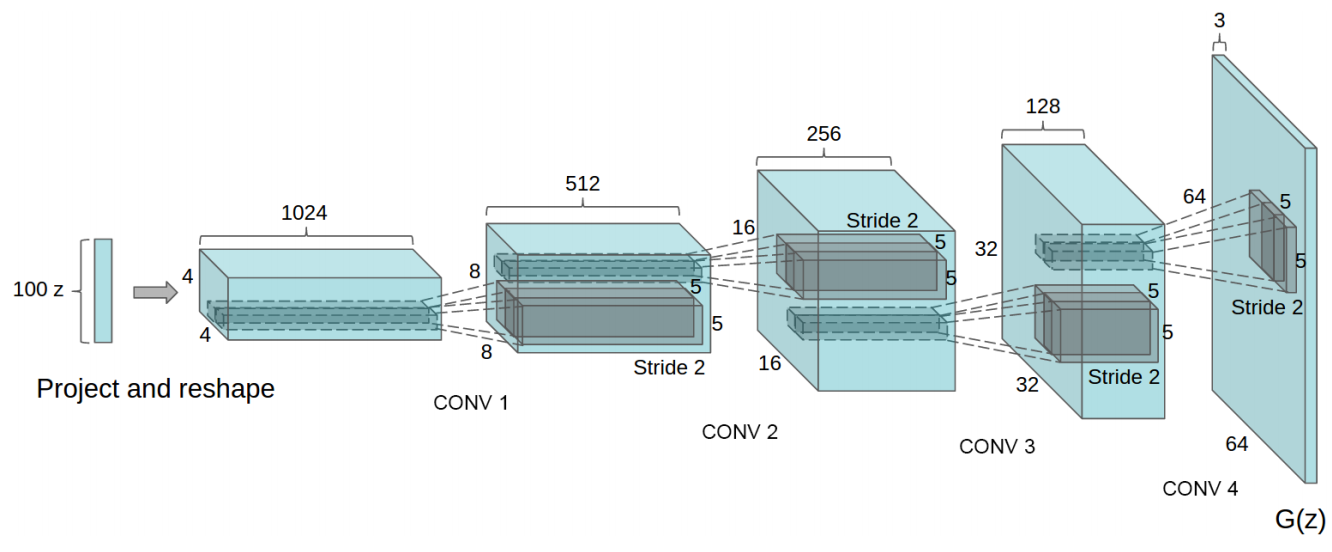

1. DCGAN实验手写字生成 请查看配套代码  
2. Github上比较好的DCGAN项目：https://github.com/carpedm20/DCGAN-tensorflow